# Homework 1: Applied Machine Learning - Linear | Logisitc | SVM

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
import random

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
pd.options.mode.chained_assignment = None

#**Part 1: Linear Regression**

In part 1, we will use **two datasets** to train and evaluate our linear regression model.

The first dataset will be a synthetic dataset sampled from the following equations:
   
**𝜖 ∼ Normal(0,3**)

**z = 3𝑥 + 10y + 10 + 𝜖**

In [4]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)
x = np.linspace(0, 10, 100) 
y = np.linspace(0, 5, 100)
z = 3 * x + 10 * y + 10 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

- Linearity: $y$ is a linear (technically affine) function of $x$.
- Independence: the $x$'s are independently drawn, and not dependent on each other.
- Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
- Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**1.1. Plot z vs x and z vs y in the synthetic dataset as scatter plots. Label your axes and make sure your y-axis starts from 0. Do the independent and dependent features have linear relationship?**

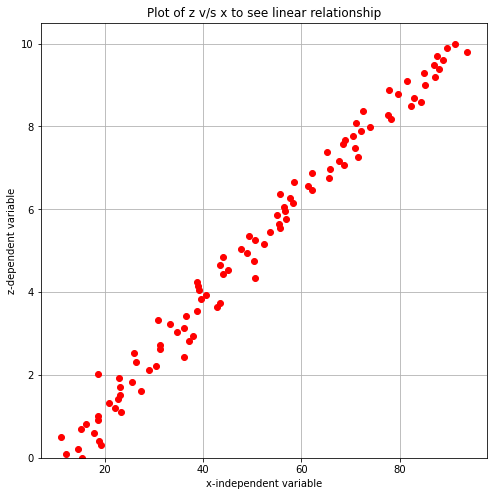

In [5]:
### Your code here
# Z v/s X relationship
fig= plt.figure(figsize=(8,8))
axes = fig.add_subplot(1,1,1)
axes.plot(z,x,'o',color = 'red',markersize=6)
#Setting the y-axis to 0 as mentioned in the problem
axes.set_ylim(ymin=0)
# naming the x axis
plt.xlabel('x-independent variable')
# naming the y axis
plt.ylabel('z-dependent variable')
# giving a title to my graph
plt.title('Plot of z v/s x to see linear relationship')
plt.grid() 

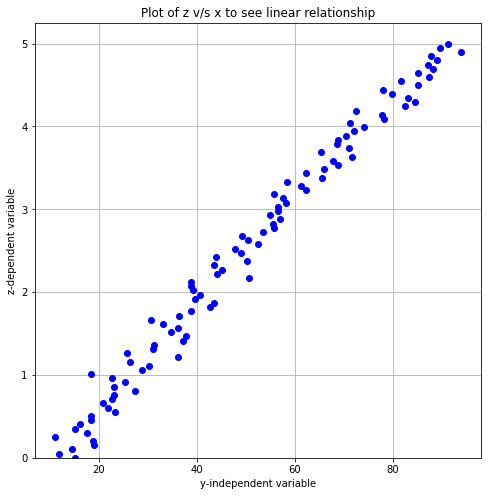

In [6]:
### Your code here
# Z v/s Y relationship
fig= plt.figure(figsize=(8,8))
axes = fig.add_subplot(1,1,1)
axes.plot(z,y,'o',color = 'blue',markersize=6)
#Setting the y-axis to 0 as mentioned in the problem
axes.set_ylim(ymin=0)
# naming the x axis
plt.xlabel('y-independent variable')
# naming the y axis
plt.ylabel('z-dependent variable')
# giving a title to my graph
plt.title('Plot of z v/s x to see linear relationship')
plt.grid() 

Yes, Both the independent variables X and Y have linear relationship with the dependent variable Z in this dataset.


**1.2. Are the independent variables correlated? Use pearson correlation to verify? What would be the problem if linear regression is applied to correlated features?**

In [7]:
### Your code here
from scipy.stats import pearsonr
pearson_coeff = pearsonr(x,y)
print(f'The Pearson correlation value between x and y is {pearson_coeff}')

The Pearson correlation value between x and y is (0.9999999999999998, 0.0)


We see that the Pearson Correlation value is really high and is close to 1 which means that the columns x and y are highly correalted in nature and not indpendent in nature.If linear regression is applied to this problem it would be really hard to implement it, since it would be difficult to get the inverse value using the closed form solution.

**The second dataset we will be using is an auto MPG dataset. This dataset contains various characteristics for around 8128 cars. We will use linear regression to predict the selling_price label**

In [8]:
auto_mpg_df = pd.read_csv('Auto_mpg_data.csv')
# Dropping Torque column, there is information in this column but it will take some preprocessing.
# The idea of the exercise is to familarize yourself with the basics of Linear regression.
auto_mpg_df = auto_mpg_df.drop(['torque'], axis = 1)

In [9]:
auto_mpg_df.head()
rows=auto_mpg_df.shape[0]

**1.3. Missing Value analysis - Auto mpg dataset.**

**Are there any missing values in the dataset? If so, what can be done about it? Jusify your approach.**

Here, we see that the mileage, engine, max_power and the seats are the columns with NaN and all of them are numerical
data. Hence we can use various methods to solve and get the values for these data points. One of them is to impute
them with mean or median value. Another approach would be to look at its k- nearest neighbors and then find the value using a knn model.Regression Models or Matrix Factorization methods also can be used to find out the missing data if they are numerical in nature.If the missing data cells are really less we can drop those rows and continue with the problem.

In [10]:
### Your code here
nan_values = auto_mpg_df[auto_mpg_df.isna().any(axis=1)]         # to get all rows with Na
display(nan_values)
indices=np.asarray(nan_values.index)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN


As Observed there are 221 rows which have NA values hence these need to be dropped. This accounts for 2.7% of the total data points.Hence I have proceeded with dropping of rows from the all the above startegies that was discussed.This ensures that the there isn't much loss of information and still we can expect to fit a good model from the remaining values.

**1.4. The features engine, max_power and mileage have units in the dataset. In the real world if we have such datasets, we generally remove the units from each feature. After doing so, convert the datatype of these columns to float. For example: 1248 CC engine is 1248, 23.4 kmpl is 23.4 and so on.**

**Hint: Check for distinct units in each of these features. A feature might have multiple units as well. Also, a feature could have no value but have unit. For example 'CC' without any value. Remove such rows.**

In [11]:
### Your code here
#Removing rows which dont have value so as to proceed than with the data cleaning process
auto_mpg_df= auto_mpg_df[auto_mpg_df.mileage.notna()]

#This removes all the rows which have NaN values in the dataset.Now we can start working on removing the units and 
#also making necessary unit changes in the dataset

#Changing the Mileage units. Here we have 2 units i.e. km/kg and kmpl.We have the conversion that the kmpl = 1.6*km/kg.
#Check the unit and make necessary changes to data to return float values of mileage all in kmpl
correctMileage=[]
for i in auto_mpg_df.mileage:
    if str(i).endswith('km/kg'):
        i=float(i[:-6])*1.4
    elif str(i).endswith('kmpl'):
        i=float(i[:-6])
    correctMileage.append(i)
auto_mpg_df['mileage']=correctMileage

#Changing the engine and max_power columns by removing the units as they dont have any other units.
correctEngine=[]
for i in auto_mpg_df.engine:
     if str(i).endswith('CC'):
        i=float(i[:-4])
        correctEngine.append(i)
auto_mpg_df['engine']=correctEngine


#Dropping elements that only have bhp written and no value against it
auto_mpg_df.drop(auto_mpg_df[auto_mpg_df['max_power'] == ' bhp'].index, inplace = True)
correctPower=[]
index=[]
for i in (auto_mpg_df.max_power):
    if str(i).endswith('bhp'):
        i=float(i[:-4])
    correctPower.append(i)

auto_mpg_df['max_power']=correctPower
auto_mpg_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,124.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,149.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,149.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,139.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,129.0,88.20,5.0


In [12]:
auto_mpg_X = auto_mpg_df.drop(columns=['selling_price'])
auto_mpg_y = auto_mpg_df['selling_price']
auto_mpg_X.shape

(7906, 11)

**1.5. Plot the distribution of the label (selling_price) using a histogram. Make multiple plots with different binwidths. Make sure to label your axes while plotting.**

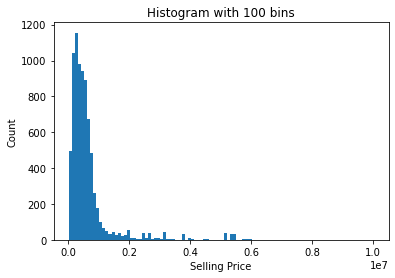

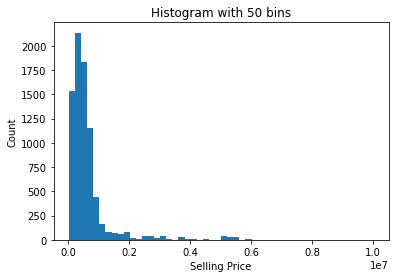

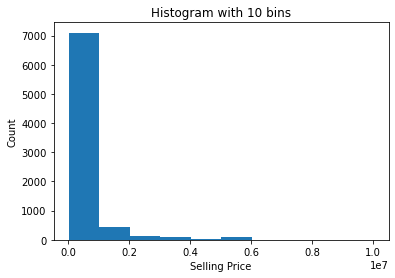

In [13]:
### Your code here
#100 Bins
bin_100=plt.hist(auto_mpg_y,bins=100)
plt.title("Histogram with 100 bins")
plt.ylabel('Count')
plt.xlabel('Selling Price')
plt.show()

#50 Bins
bin_50=plt.hist(auto_mpg_y,bins=50)
plt.title("Histogram with 50 bins")
plt.ylabel('Count')
plt.xlabel('Selling Price')
plt.show()

#10 Bins
bin_10=plt.hist(auto_mpg_y,bins=10)
plt.title("Histogram with 10 bins")
plt.ylabel('Count')
plt.xlabel('Selling Price')
plt.show()

**1.6. Plot the relationships between the label (Selling Price) and the continuous features (Mileage, km driven, engine, max power) using a small multiple of scatter plots. 
Make sure to label the axes. Do you see something interesting about the distributions of these features.**

/Users/rakshithkamath/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rakshithkamath/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rakshithkamath/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

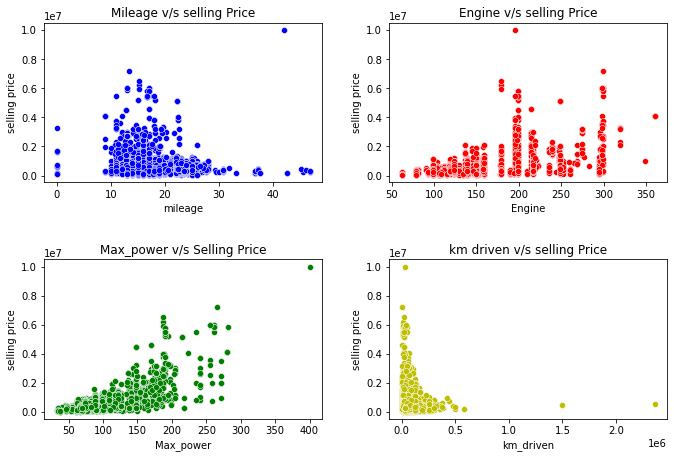

In [14]:
### Your code here
fig, axs = plt.subplots(2, 2,figsize=(10,7))
axs[0, 0]=sns.scatterplot(auto_mpg_X['mileage'],auto_mpg_y, color="b",ax=axs[0][0])
axs[0, 0].set_title('Mileage v/s selling Price')
axs[0, 0].set(xlabel='mileage', ylabel='selling price')
axs[0, 1]=sns.scatterplot(auto_mpg_X['engine'],auto_mpg_y, color="r",ax=axs[0][1])
axs[0, 1].set_title('Engine v/s selling Price')
axs[0, 1].set(xlabel='Engine', ylabel='selling price')
axs[1, 0]=sns.scatterplot(auto_mpg_X['max_power'],auto_mpg_y, color="g",ax=axs[1][0])
axs[1, 0].set_title('Max_power v/s Selling Price')
axs[1, 0].set(xlabel='Max_power', ylabel='selling price')
axs[1, 1]=sns.scatterplot(auto_mpg_X['km_driven'],auto_mpg_y, color="y",ax=axs[1][1])
axs[1, 1].set_title('km driven v/s selling Price')
axs[1, 1].set(xlabel='km_driven', ylabel='selling price')
fig.tight_layout(pad=3.0)

For example we see that for Max_Power there is a linear relationship seen with selling price and Max power. As the Max Power increases the selling price also increases. Similar relationship is seen amongst other features as well. This shows that we can use this features for building the regression model.

**1.7. Plot the relationships between the label (Selling Price) and the discrete features (fuel type, Seller type, transmission) using a small multiple of box plots. Make sure to label the axes.**

/Users/rakshithkamath/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rakshithkamath/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rakshithkamath/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

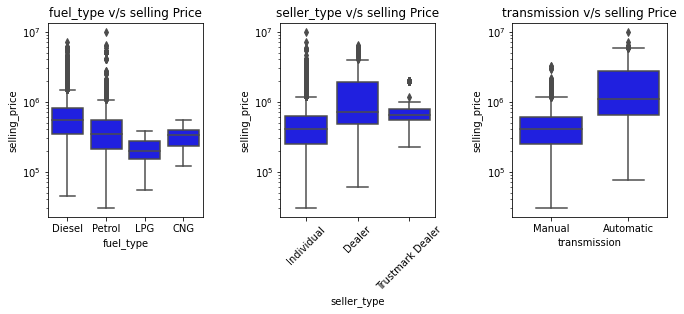

In [15]:
### Your code here
fig=plt.figure(0,figsize=(10,5))
ax1 = plt.subplot2grid((1,3), (0,0))
ax1=sns.boxplot(auto_mpg_X['fuel'],auto_mpg_y, color="b")
ax1.set(xlabel='fuel_type', ylabel='selling_price')
ax1.set_yscale('log')
ax1.set_title('fuel_type v/s selling Price')
ax2 = plt.subplot2grid((1,3), (0,1))
ax2=sns.boxplot(auto_mpg_X['seller_type'],auto_mpg_y, color="b")
ax2.set(xlabel='seller_type', ylabel='selling_price')
ax2.set_yscale('log')
ax2.set_title('seller_type v/s selling Price')
plt.xticks(rotation = 45)

ax3 = plt.subplot2grid((1,3), (0,2))
ax3=sns.boxplot(auto_mpg_X['transmission'],auto_mpg_y, color="b")
ax3.set(xlabel='transmission', ylabel='selling_price')
ax3.set_yscale('log')
ax3.set_title('transmission v/s selling Price')

fig.tight_layout(pad=3.0)

plt.show()


**1.8. From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not?**

Linear Regression can be applied here to get the selling price as we see certain features such as transmission, fuel_type and also can see a linear relationship with max_power and engine w.r.t to selling price as well. All of these categorical features along with the numerical features put together could help us in predicting the selling price.

In [16]:
auto_mpg_X['year'] =  2020 - auto_mpg_X['year']

In [17]:
#dropping the car name as it is irrelevant.
auto_mpg_X.drop(['name'],axis = 1,inplace=True)

#check out the dataset with new changes
auto_mpg_X.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,6,145500,Diesel,Individual,Manual,First Owner,23.0,124.0,74.00,5.0
1,6,120000,Diesel,Individual,Manual,Second Owner,21.1,149.0,103.52,5.0
2,14,140000,Petrol,Individual,Manual,Third Owner,17.0,149.0,78.00,5.0
3,10,127000,Diesel,Individual,Manual,First Owner,23.0,139.0,90.00,5.0
4,13,120000,Petrol,Individual,Manual,First Owner,16.0,129.0,88.20,5.0


**Data Pre-processing**

#**1.9.
Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:**
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [18]:
# 1. No categorical features in the synthetic dataset (skip this step)
import category_encoders as ce
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

te_features =['fuel',
              'seller_type',
              'transmission',
            ]
oe_features=['owner']
num_features=['year',
              'km_driven',
              'mileage',
              'engine',
              'max_power',
              'seats']
cat_owner=[['Test Drive Car','First Owner', 'Second Owner', 'Third Owner','Fourth & Above Owner']]
preprocess = make_column_transformer(
     (MinMaxScaler(),num_features),
     (OrdinalEncoder(categories=cat_owner), oe_features),
     (TargetEncoder(), te_features))

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev,X_test,y_dev,auto_mpg_y_test = train_test_split(auto_mpg_X,auto_mpg_y,test_size=0.2, random_state=42)
X_train,X_val,auto_mpg_y_train,auto_mpg_y_val = train_test_split(X_dev,y_dev,test_size=0.25, random_state=42)
# 3. Standardize the columns in the feature matrices
X_train_scaled = preprocess.fit_transform(X_train,auto_mpg_y_train)
X_val_scaled = preprocess.transform(X_val)
X_test_scaled = preprocess.transform(X_test)
# 4. Add a column of ones to the feature matrices
auto_mpg_X_train = np.append(X_train_scaled, np.ones((X_train.shape[0],1)), axis=1)
auto_mpg_X_val = np.append(X_val_scaled, np.ones((X_val.shape[0],1)), axis=1)
auto_mpg_X_test = np.append(X_test_scaled, np.ones((X_test.shape[0],1)), axis=1)
auto_mpg_X_train.shape

(4743, 11)

**At the end of this pre-processing, you should have the following vectors and matrices:**

**- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test**

**Implement Linear Regression**

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**1.10. Implement a `LinearRegression` class with two methods: `train` and `predict`. You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [19]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        self.w = np.dot(np.linalg.inv(np.dot(X.T,X) + self.alpha* np.identity(X.shape[1]))
                ,np.dot(X.T,y))
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        y_pred = np.dot(X,self.w)
        return y_pred

**Train, Evaluate, and Interpret Linear Regression Model**

**1.11. A) Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 5 predictions on the test set, along with the actual labels.**

In [20]:
### Your code here
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
LR.train(auto_mpg_X_train,auto_mpg_y_train)#Training the data

y_train_pred = LR.predict(auto_mpg_X_train)#Checking accuracy of training data
y_train_loss = mean_squared_error(y_train_pred,auto_mpg_y_train)
print(f'The MSE for train data is {y_train_loss}')

y_val_pred = LR.predict(auto_mpg_X_val)#Checking accuracy of validation data
y_val_loss = mean_squared_error(y_val_pred,auto_mpg_y_val)
print(f'The MSE for validation data is {y_val_loss}')

y_test_pred = LR.predict(auto_mpg_X_test)#Checking accuracy of training data
y_test_loss = mean_squared_error(y_test_pred,auto_mpg_y_test)
print(f'The MSE for test data is {y_test_loss}')


auto_mpg_y_test=auto_mpg_y_test.to_numpy()


The MSE for train data is 214829618904.09152
The MSE for validation data is 209969078610.6775
The MSE for test data is 211539441240.51273


In [21]:
#Printing the first 5 Labels of the test set and its predictions 
for i in range(5,):
    print(f'The actual y_test value:{auto_mpg_y_test[i]} and the predicted y_test value: {y_test_pred[i]}')

The actual y_test value:501000 and the predicted y_test value: 645743.8177073717
The actual y_test value:440000 and the predicted y_test value: 422504.94746382115
The actual y_test value:140000 and the predicted y_test value: 91913.05220389727
The actual y_test value:476999 and the predicted y_test value: 413033.0925005926
The actual y_test value:620000 and the predicted y_test value: 1055810.1819027984


**B) As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline. This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.**

In [22]:
### Your code here
from sklearn.metrics import mean_squared_error
train_mean=auto_mpg_y_train.mean()
train_normalized = [train_mean for i in auto_mpg_y_train]
val_normalized = [train_mean for i in auto_mpg_y_val]
test_normalized = [train_mean for i in auto_mpg_y_test]
train_baseline_mse=mean_squared_error(train_normalized,auto_mpg_y_train)
val_baseline_mse=mean_squared_error(val_normalized,auto_mpg_y_val)
test_baseline_mse=mean_squared_error(test_normalized,auto_mpg_y_test)
print(f'The baseline MSE are as follows-')
print(f'Train-{train_baseline_mse}')
print(f'Validation-{val_baseline_mse}')
print(f'Test-{test_baseline_mse}')

The baseline MSE are as follows-
Train-662695177733.76
Validation-625775241109.3202
Test-695299107097.1223


**1.12. Interpret your model trained on the auto MPG dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! Use lecture 3, slide 15 as a reference. According to your model, which features are the greatest contributors to the selling price**

/Users/rakshithkamath/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'weight values')

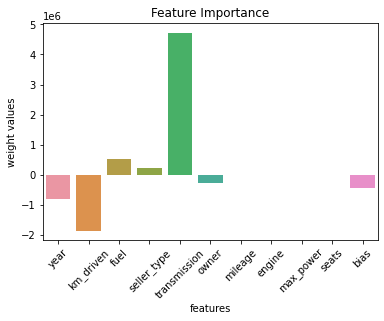

In [23]:
### Your code here
plt.figure()
columns =['year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats','bias']
ax1=sns.barplot(columns,LR.w)
plt.xticks(rotation = 45)
plt.title('Feature Importance')
plt.xlabel('features')
plt.ylabel('weight values')


According to the model transmission is an important feature that determines the value of selling price. It is directly propertional to the selling price. As for other features, km_driven seems to negatively impact the selling price. As it increases the selling price decreases. Also year has the similar effect as that of km driven.
Also we see that introduction of bias has helped in building the model as there is a small value of it present in the weights.

**Tune Regularization Parameter $\alpha$**

**Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.**

**1.13. Sweep out values for $\alpha$ using `alphas = np.logspace(-2, 1, 10)`. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.**

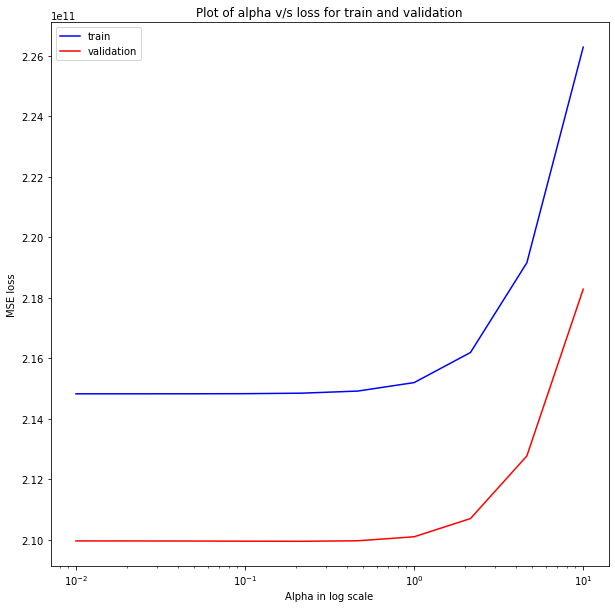

In [24]:
### Your code here
alphas = np.logspace(-2, 1, 10)
alp=[]
y_train_loss=[]
y_val_loss=[]
for alpha in alphas:
    alp.append(alpha)
    LR = LinearRegression(alpha=alpha)
    LR.train(auto_mpg_X_train,auto_mpg_y_train)#Training the data

    y_train_pred = LR.predict(auto_mpg_X_train)#Checking accuracy of training data
    y_train_loss.append(mean_squared_error(y_train_pred,auto_mpg_y_train))

    y_val_pred = LR.predict(auto_mpg_X_val)#Checking accuracy of validation data
    y_val_loss.append(mean_squared_error(y_val_pred,auto_mpg_y_val))
fig = plt.figure(figsize=(10,10))
ax1=plt.plot(alphas,y_train_loss,color='b',label='train')
ax1=plt.plot(alphas,y_val_loss,color='r',label='validation')
plt.xscale('log') 
plt.xlabel('Alpha in log scale')
plt.ylabel('MSE loss')
plt.title('Plot of alpha v/s loss for train and validation')
plt.legend()

**Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?**

As the model becomes less complex i.e. increasing alpha, we see that the error is increasing which means that the dataset requires fine tuning and the best value of alpha for the problem would be 0.21 and using L2 regularization on the weights of features wouldnt be a good estimate since it tries to suppress the weights of features that are key in giving us the estimate of the selling price which in this case wouldn't work out.We see that model was a good fit at lower alpha since validation error is lower as well. As Alpha increases it results in underfitting the model which increases the error.

**1.14. Using the $\alpha$ which gave the best validation MSE above, train a model on the training set. Report the value of $\alpha$ and its training, validation, and test MSE. This is the final tuned model which you would deploy in production.**

In [25]:
### Your code here
alpha=alp[np.argmin(y_val_loss)]
LR = LinearRegression(alpha=alpha)
LR.train(auto_mpg_X_train,auto_mpg_y_train)#Training the data

y_train_pred = LR.predict(auto_mpg_X_train)#Checking accuracy of training data
print(f'Train MSE-{mean_squared_error(y_train_pred,auto_mpg_y_train)}')

y_val_pred = LR.predict(auto_mpg_X_val)#Checking accuracy of validation data
print(f'Validation MSE-{mean_squared_error(y_val_pred,auto_mpg_y_val)}')

y_test_pred = LR.predict(auto_mpg_X_test)#Checking accuracy of validation data
print(f'Test MSE-{mean_squared_error(y_test_pred,auto_mpg_y_test)}')

print(f'Best Alpha-{alpha}')

Train MSE-214850505575.39392
Validation MSE-209955037649.01614
Test MSE-211364846563.4214
Best Alpha-0.21544346900318834


# **Part 2: Logistic Regression**

**Gender Recognition by Voice and Speech Analysis**

**This dataset is used to identify a voice as male or female, based upon acoustic properties of the voice and speech.**

In [26]:
voice_df = pd.read_csv("voice-classification.csv")
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Data - Checking Rows & Columns**

In [27]:
#Number of Rows & Columns
print(voice_df.shape) 

(3168, 21)


**2.1 What is the probability of observing different  categories in the Label feature of the dataset?**

This is mainly to check class imbalance in the dataset, and to apply different techniques to balance the dataset, which we will learn later.

In [28]:
#code here
male_number=len(np.array(voice_df[voice_df['label']== 'male'].index))
print(f'Total number of speakers in the dataset are {voice_df.shape[0]}')
print(f'Probability speaker is male {male_number/voice_df.shape[0]}')
print(f'Probability is female {(voice_df.shape[0]-male_number)/voice_df.shape[0]}')

Total number of speakers in the dataset are 3168
Probability speaker is male 0.5
Probability is female 0.5


Class is perfefctly balanced in this case

**2.2 Plot the relationships between the label and the 20 numerical features using a small multiple of box plots. Make sure to label the axes. What useful information do this plot provide?**

/Users/rakshithkamath/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rakshithkamath/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rakshithkamath/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

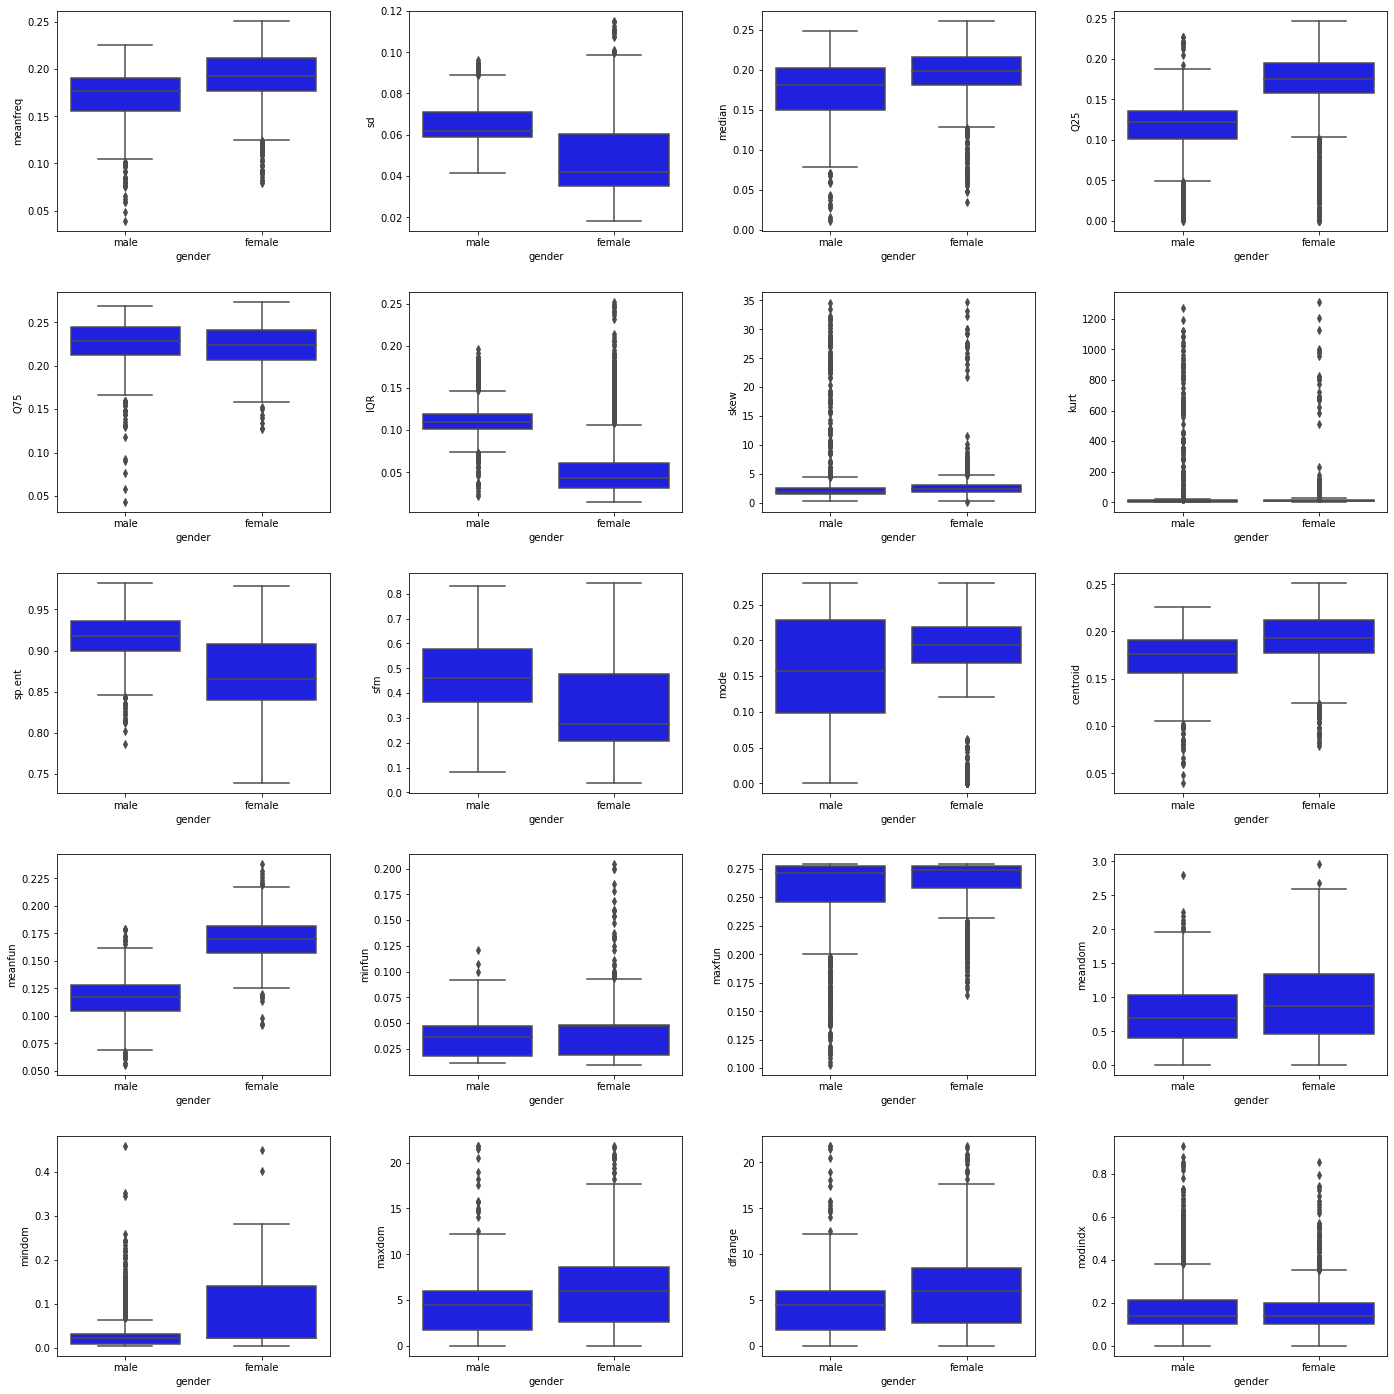

In [29]:
#Getting all the columns for the box plot
columns=list(voice_df.columns.values)

fig=plt.figure(0,figsize=(20,20))
ax1 = plt.subplot2grid((5,4), (0,0))
ax1=sns.boxplot(voice_df['label'],voice_df['meanfreq'], color="b")
ax1.set(xlabel='gender', ylabel='meanfreq')

ax2 = plt.subplot2grid((5,4), (0,1))
ax2=sns.boxplot(voice_df['label'],voice_df['sd'], color="b")
ax2.set(xlabel='gender', ylabel='sd')

ax3 = plt.subplot2grid((5,4), (0,2))
ax3=sns.boxplot(voice_df['label'],voice_df['median'], color="b")
ax3.set(xlabel='gender', ylabel='median')

ax4 = plt.subplot2grid((5,4), (0,3))
ax4=sns.boxplot(voice_df['label'],voice_df['Q25'], color="b")
ax4.set(xlabel='gender', ylabel='Q25')

ax5 = plt.subplot2grid((5,4), (1,0))
ax5=sns.boxplot(voice_df['label'],voice_df['Q75'], color="b")
ax5.set(xlabel='gender', ylabel='Q75')

ax6 = plt.subplot2grid((5,4), (1,1))
ax6=sns.boxplot(voice_df['label'],voice_df['IQR'], color="b")
ax6.set(xlabel='gender', ylabel='IQR')

ax7 = plt.subplot2grid((5,4), (1,2))
ax7=sns.boxplot(voice_df['label'],voice_df['skew'], color="b")
ax7.set(xlabel='gender', ylabel='skew')

ax8 = plt.subplot2grid((5,4), (1,3))
ax8=sns.boxplot(voice_df['label'],voice_df['kurt'], color="b")
ax8.set(xlabel='gender', ylabel='kurt')

ax9 = plt.subplot2grid((5,4), (2,0))
ax9=sns.boxplot(voice_df['label'],voice_df['sp.ent'], color="b")
ax9.set(xlabel='gender', ylabel='sp.ent')

ax10 = plt.subplot2grid((5,4), (2,1))
ax10=sns.boxplot(voice_df['label'],voice_df['sfm'], color="b")
ax10.set(xlabel='gender', ylabel='sfm')

ax11 = plt.subplot2grid((5,4), (2,2))
ax11=sns.boxplot(voice_df['label'],voice_df['mode'], color="b")
ax11.set(xlabel='gender', ylabel= 'mode')

ax12 = plt.subplot2grid((5,4), (2,3))
ax12=sns.boxplot(voice_df['label'],voice_df['centroid'], color="b")
ax12.set(xlabel='gender', ylabel='centroid')

ax13 = plt.subplot2grid((5,4), (3,0))
ax13=sns.boxplot(voice_df['label'],voice_df['meanfun'], color="b")
ax13.set(xlabel='gender', ylabel='meanfun')

ax14 = plt.subplot2grid((5,4), (3,1))
ax14=sns.boxplot(voice_df['label'],voice_df['minfun'], color="b")
ax14.set(xlabel='gender', ylabel='minfun')

ax15 = plt.subplot2grid((5,4), (3,2))
ax15=sns.boxplot(voice_df['label'],voice_df['maxfun'], color="b")
ax15.set(xlabel='gender', ylabel='maxfun')

ax16 = plt.subplot2grid((5,4), (3,3))
ax16=sns.boxplot(voice_df['label'],voice_df['meandom'], color="b")
ax16.set(xlabel='gender', ylabel='meandom')

ax17 = plt.subplot2grid((5,4), (4,0))
ax17=sns.boxplot(voice_df['label'],voice_df['mindom'], color="b")
ax17.set(xlabel='gender', ylabel='mindom')

ax18 = plt.subplot2grid((5,4), (4,1))
ax18=sns.boxplot(voice_df['label'],voice_df['maxdom'], color="b")
ax18.set(xlabel='gender', ylabel='maxdom')

ax19 = plt.subplot2grid((5,4), (4,2))
ax19=sns.boxplot(voice_df['label'],voice_df['dfrange'], color="b")
ax19.set(xlabel='gender', ylabel='dfrange')

ax20= plt.subplot2grid((5,4), (4,3))
ax20=sns.boxplot(voice_df['label'],voice_df['modindx'], color="b")
ax20.set(xlabel='gender', ylabel='modindx')

fig.tight_layout(pad=3.0)
plt.show()

Based on the plot we can see that for various features the value for male and female are quite distinguished. This will help us in segregation and forming the hyperplane at an hogher dimension when combined with all other features for SVM. In case of Logistic regression this can help us get the idea of the outliers for each label for each of the features. Also we get the idea of the median values for each gender that can halp us distinguish the gender.This also helps us in understanding statistical distribution of the data.It gives us a visual summary of spread and locality.

**2.3 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

We see that from the heat map meanfreq,centroid,Q25 and median are highly correlated.skew and kurt are highly correlated.dfrange and maxdom are also perfectly correlated. Keeping meanfreq,skew and dfrange and dropping the others i.e.centroid,Q25,median,maxdom,kurt.It is important to remove because multi-collinearity might arise and result to numerical instability.

/var/folders/c2/tk0nr7k97gs06t559smt6r000000gn/T/ipykernel_36458/2567555813.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


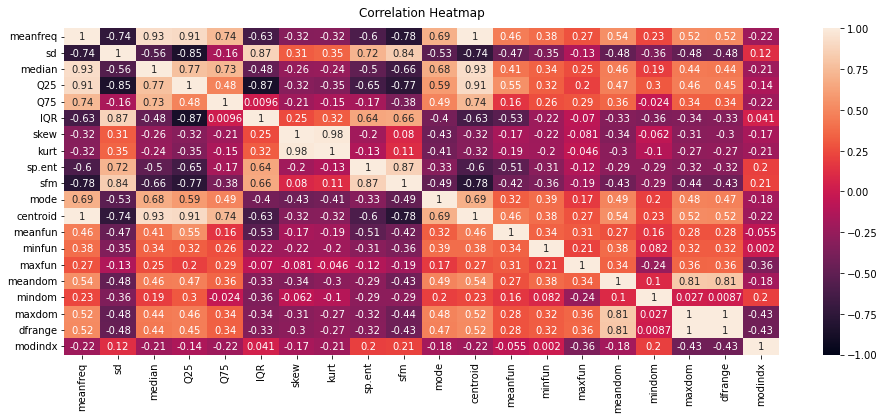

In [30]:
#code here
voice_corr=voice_df.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(voice_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

cor_matrix = voice_df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
voice_df1 = voice_df.drop(to_drop, axis=1)

**Separating Features & Y variable from the processed dataset**

**Please note to replace the dataframe below with the new dataframe created after removing highly correlated features**

In [31]:
# Split data into features and labels
voice_X = voice_df1.drop(columns=['label']) #replace "voice_df1" with your dataframe from 2.3 to make sure the code runs
voice_y = voice_df1['label']
# print(voice_X.columns)

**2.4 Apply the following pre-processing steps:**

1) Use OrdinalEncoding to encode the label in the dataset (male & female)

2) Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.

3)Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [32]:
#code here
#1) ordinal encoding to the voice_y i.e. label dataset
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[['male','female']])
voice_y = enc.fit_transform(voice_y.to_numpy().reshape(-1,1))
#2) converting dataset to numpy
voice_X=voice_X.to_numpy()
#3) split data into training validation and test
from sklearn.model_selection import train_test_split
X_dev,X_test,y_dev,y_test = train_test_split(voice_X,voice_y,test_size=0.2, random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_dev,y_dev,test_size=0.25, random_state=42)
#4) standardise the dataset using training only and use these values in val and test sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#5) Adding a column of ones to all the 3 X's
X_train = np.append(X_train_scaled, np.ones((X_train.shape[0],1)), axis=1)

X_val = np.append(X_val_scaled, np.ones((X_val.shape[0],1)), axis=1)
X_test = np.append(X_test_scaled, np.ones((X_test.shape[0],1)), axis=1)


**2.5 Implement Logistic Regression**

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


Implement a LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid. **You may NOT use sklearn for this implementation. It is highly recommended that you vectorize your code.**

In [33]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha, t, eta):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        ### Your code here
        #initialization of w needs to be done at the begining
        if self.w is None:
            self.w = np.zeros([X.shape[1],1])
        self.w =self.w - self.eta*self.calculate_gradient(X,y)
        return self.calculate_loss(X,y)
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        ### Your code here
        y_pred = np.around(self.calculate_sigmoid(np.dot(X,self.w)))
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        ### Your code here
        y=np.array(y)
        X=np.array(X)
        term1 =np.dot(y.T,np.log(self.calculate_sigmoid(np.dot(X,self.w))))
        term2=np.dot((1-y).T,np.log(1-np.array(self.calculate_sigmoid(np.dot(X,self.w)))))
        term3=self.alpha*np.dot(self.w,self.w.T)
        loss=-term1-term2+term3
        return loss[0][0]
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        ### Your code here
        gradient= np.dot(np.transpose(X),(self.calculate_sigmoid(np.dot(X,self.w)) -y)) + 2*self.alpha*self.w
        return gradient
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        ### Your code here
        sigmoid_x = 1/(1 + np.exp(-x))
        return sigmoid_x
        

**2.6 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

Trained model using random search succesfully using params alpha:0.5889749928601001 and eta:0.0009824043441363322


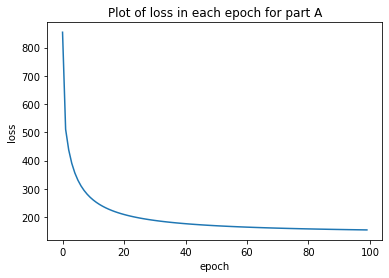

In [34]:
#code here
#A)
alpha =0
t=100
eta =1e-3
LR1 =LogisticRegression(alpha,t,eta)
loss_vector=[]
for i in range(0,t):
    loss = LR1.train(X_train,y_train)
    loss_vector.append(loss)
plt.figure()
plt.plot(np.arange(100),loss_vector)
plt.title('Plot of loss in each epoch for part A')
plt.xlabel('epoch')   
plt.ylabel('loss')

#B) 
loss_vector2=np.zeros(20)
alpha_buf=np.zeros(20)
eta_buf=np.zeros(20)
for batch in range(0,20):#Considering 20 random spaces
    alpha = random.uniform(0,1)
    eta = random.uniform(0,0.001)
    
    t =random.randint(1,100)
    LR2 =LogisticRegression(alpha,t,eta)
    for i in range(0,t):
        loss = LR2.train(X_train,y_train)
    loss_vector2[batch]=abs(loss).sum()
    alpha_buf[batch]=alpha
    eta_buf[batch]=eta
#     print(f'The loss for batch {batch} = {abs(loss).sum()}')
#Get the model with least error
index=np.argmin(loss_vector2)
#Train the model again using these parameters
LR2 =LogisticRegression(alpha_buf[index],t,eta_buf[index])
for i in range(0,t):
    loss = LR2.train(X_train,y_train)
print(f"Trained model using random search succesfully using params alpha:{alpha_buf[index]} and eta:{eta_buf[index]}")


In [35]:
#C)Checking accuracy of both the models
y_pred_1 =LR1.predict(X_test)
accuracy_1=np.count_nonzero(y_pred_1 == y_test)/y_test.shape[0]

y_pred_2 =LR2.predict(X_test)
accuracy_2=np.count_nonzero(y_pred_2 == y_test)/y_test.shape[0]
print(f'Accuracy of model 1 is {accuracy_1} and model 2 is {accuracy_2}')

Accuracy of model 1 is 0.9794952681388013 and model 2 is 0.9810725552050473


We observe that the accuracy of the baseline model and after random search hyperparameter tuning are similar. This is beacuse the of the fact that the search space during random search is less i.e. only 20. To get the better accuracy we need to look at more points in the space.

**2.7 Feature Importance**

Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! 

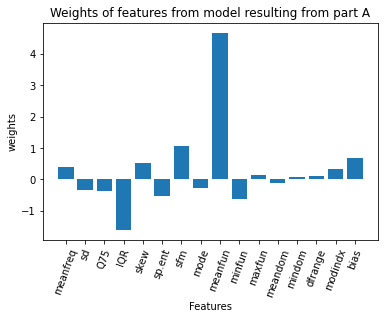

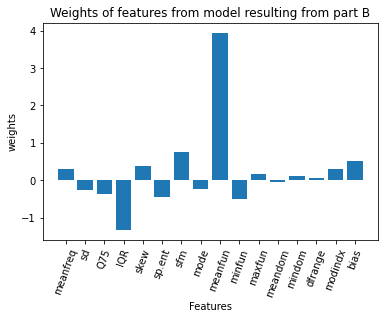

In [36]:
#code here
weights1=LR1.w.flatten()
weights2=LR2.w.flatten()
columns =['meanfreq','sd','Q75','IQR','skew','sp.ent','sfm','mode','meanfun','minfun','maxfun','meandom','mindom','dfrange','modindx','bias']
fig = plt.figure()
plt.bar(columns,weights1)
plt.xticks(rotation = 70)
plt.xlabel('Features')
plt.ylabel('weights')
plt.title('Weights of features from model resulting from part A')
plt.show()

fig = plt.figure()
plt.bar(columns,weights2)
plt.xticks(rotation = 70)
plt.xlabel('Features')
plt.ylabel('weights')
plt.title('Weights of features from model resulting from part B')
plt.show()



# **Part 3: Support Vector Machines - with the same Dataset**

**3.1 Dual SVM**

A) Train a dual SVM (with default parameters) for both kernel=“linear” and kernel=“rbf”) on the Voice Recognition training data.

B) Make predictions and report the accuracy on the training, validation, and test sets. Which kernel gave better accuracy on test dataset and why do you think that was better?

C) Please report the support vectors in both the cases and what do you observe? Explain


In [37]:
#code here
#LINEAR KERNEL
clf= SVC(kernel ='linear')
clf.fit(X_train,y_train)# Train the data using train data
# Predicting Train accuracy
y_train_pred = clf.predict(X_train)
y_train_pred=np.reshape(y_train_pred,(y_train.shape[0], 1))
print(f'The training Accuracy for linear kernel is {np.count_nonzero(y_train_pred == y_train)/y_train_pred.shape[0]}')
#Predicting validation accuracy
y_val_pred = clf.predict(X_val)
y_val_pred=np.reshape(y_val_pred,(y_val.shape[0], 1))
print(f'The Validation Accuracy for linear kernel is {np.count_nonzero(y_val_pred == y_val)/y_val_pred.shape[0]}')
# Predicting test accuracy
y_test_pred = clf.predict(X_test)
y_test_pred=np.reshape(y_test_pred,(y_test.shape[0], 1))
print(f'The Test Accuracy for linear kernel is {np.count_nonzero(y_test_pred == y_test)/y_test_pred.shape[0]}')
support_vectors_linear=clf.support_vectors_
print(f'Number of support vectors in linear kernel are {support_vectors_linear.shape[0]}')
##########################################################################################################################
#RBF kernel
clf_rbf= SVC(kernel ='rbf')
clf_rbf.fit(X_train,y_train)# Train the data using train data
# Predicting Train accuracy
y_train_pred = clf_rbf.predict(X_train)
y_train_pred=np.reshape(y_train_pred,(y_train.shape[0], 1))
print(f'The training Accuracy for rbf kernel is {np.count_nonzero(y_train_pred == y_train)/y_train_pred.shape[0]}')
#Predicting validation accuracy
y_val_pred = clf_rbf.predict(X_val)
y_val_pred=np.reshape(y_val_pred,(y_val.shape[0], 1))
print(f'The Validation Accuracy for rbf kernel is {np.count_nonzero(y_val_pred == y_val)/y_val_pred.shape[0]}')
# Predicting test accuracy
y_test_pred = clf_rbf.predict(X_test)
y_test_pred=np.reshape(y_test_pred,(y_test.shape[0], 1))
print(f'The Test Accuracy for rbf kernel is {np.count_nonzero(y_test_pred == y_test)/y_test_pred.shape[0]}')
support_vectors_rbf=clf_rbf.support_vectors_
print(f'Number of support vectors in rbf kernel are {support_vectors_rbf.shape[0]}')


The training Accuracy for linear kernel is 0.9815789473684211
The Validation Accuracy for linear kernel is 0.9621451104100947
The Test Accuracy for linear kernel is 0.9763406940063092
Number of support vectors in linear kernel are 139
The training Accuracy for rbf kernel is 0.9868421052631579
The Validation Accuracy for rbf kernel is 0.9763406940063092
The Test Accuracy for rbf kernel is 0.9810725552050473
Number of support vectors in rbf kernel are 274


/Users/rakshithkamath/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rakshithkamath/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


b)The rbf kernel score is better for all the cases because rbf kernel gives non-linear hyperplane and linear kernel gives us a linear separation.This makes it easier for rbf kernel to get the best hyperplane and in turn gives us better accuracy.Also,the rbf kernel uses more support vectors to train the model and to find a better hyperplane than the linear model. 


c)We observe that the rbf kernel has more support vectors. This is because due to the kernel's feature to map it to very large dimension (nearly infinite). Here the linear maps it to a much lower space than rbf hence the lower support vector's to split the data and lower the accuracy.


**3.2 Using Kernel “rbf”, tune the hyperparameter “C” using the Grid Search & k-fold cross validation. You may take k=5 and assume values in grid between 1 to 100 with interval range of your choice.**

In [38]:
#code here
#here we take dev dataset for the GridSearchCV.k=5 by default so not changing it since the same is asked in the problem
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
preprocessor = StandardScaler()
dual_rbf = Pipeline(steps=[('preprocessor', preprocessor), ('dualSVM', SVC())])

param_grid = {
    'dualSVM__kernel': ['rbf'],
    'dualSVM__C': np.logspace(0,2,10)
}

kernel_grid = GridSearchCV(
    dual_rbf, 
    param_grid = param_grid,
    cv = 5)

kernel_grid.fit(X_dev, y_dev.flatten());
print(f'Best Parameters: {kernel_grid.best_params_}')
print(f'Best Score: {kernel_grid.best_score_}')


Best Parameters: {'dualSVM__C': 1.6681005372000588, 'dualSVM__kernel': 'rbf'}
Best Score: 0.9822446227128502
